In [2]:
from tsai.models import InceptionTime, TST, ResNet
# from tsai.data.core import get_UCR_data
# from tsai.learner import TSClassifier
import os
import numpy as np
import sys
print(sys.executable)
import sys
sys.path.insert(1, '../src/')
from CNN_classifier_model import CNNClassifier, train_model, evaluate_model
from config import raw_data_path, univariate_data_path, processed_data_path
from preprocessing_modules import create_time_windows_with_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from collections import Counter
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import wandb
wandb.login(key="5f15eb7efc1e0e939ccc83345338a0b8c24e2fbc")


/home/nwertheim/miniconda3/bin/python


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/nwertheim/.netrc
wandb: Currently logged in as: noorwertheim to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
import wandb
from fastai.callback.wandb import WandbCallback

# Initialize WandB logging
wandb.init(project='ResNet')

In [4]:
# Final Hyperparameters
batch_size = 64
learning_rate = 7.991870883780338e-05

In [5]:

# '''MY DATA'''
# train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_old_train_old.npy")
# train_data = np.load(train_dir, allow_pickle=True)
# # train_data = pd.DataFrame(train_data)
# test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_old_test_old.npy")
# test_data = np.load(test_dir, allow_pickle=True)
# # test_data = pd.DataFrame(test_data)
# print(len(train_data))
# print(len(test_data))
# print(train_data[0])
# from torch.utils.data import DataLoader, TensorDataset, random_split
# from sklearn.utils.class_weight import compute_class_weight

# from collections import Counter

# # Example dataset with windows and labels
# train_windows, train_labels = create_time_windows_with_labels(train_data)
# test_windows, test_labels = create_time_windows_with_labels(test_data)

# # Count label distribution
# train_label_counts = Counter(train_labels)
# test_label_counts = Counter(test_labels)

# # Print the counts
# print("Train label distribution:")
# print(f"  Term (0): {train_label_counts[0]}")
# print(f"  Preterm (1): {train_label_counts[1]}")

# print("\nTest label distribution:")
# print(f"  Term (0): {test_label_counts[0]}")
# print(f"  Preterm (1): {test_label_counts[1]}")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# # Convert to tensors
# train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
# train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
# test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
# test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

# train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
# test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)

# train_labels_tensor = train_labels_tensor.long()
# test_labels_tensor = test_labels_tensor.long()


# print(train_labels_tensor.shape)

# train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
# test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# # Create DataLoaders
# batch_size = 32

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
# print(len(train_windows_tensor))


# '''CROSSENTROPY LOSS'''
# from tsai.models import ResNet
# from tsai.models.ResNet import ResNet
# from fastai.metrics import accuracy
# from fastai.data.core import DataLoaders
# from fastai.learner import Learner
# import torch
# from fastai.losses import CrossEntropyLossFlat
# # Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Wrap your DataLoaders and set device
# dls = DataLoaders.from_dsets(
#     train_dataset,
#     test_dataset,
#     bs=32,
#     shuffle=True,
#     num_workers=0  # avoid multiprocessing issues
# )
# # Define model
# model = ResNet(1, 2)

# # Create Learner
# # learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
# # learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy, cbs=[WandbCallback()])
# learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# # Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
# learn.model.to(device)

# learn.dls.to(device)
# # Train
# learn.fit_one_cycle(6, 1e-6)


# learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# import torch

# # Get predictions and true labels
# preds, targs = learn.get_preds(dl=learn.dls.valid)

# # Convert predictions to class labels (argmax for multi-class classification)
# pred_labels = preds.argmax(dim=1)

# # Compute confusion matrix
# cm = confusion_matrix(targs, pred_labels)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# from sklearn.metrics import (
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     average_precision_score,
#     roc_auc_score
# )

# # Convert to numpy arrays if needed
# true_labels = targs.cpu().numpy()
# pred_labels = pred_labels.cpu().numpy()
# pred_probs = preds[:, 1].cpu().numpy()  # Probability of class 1

# # Compute metrics
# accuracy = accuracy_score(true_labels, pred_labels)
# precision = precision_score(true_labels, pred_labels, zero_division=0)
# recall = recall_score(true_labels, pred_labels, zero_division=0)
# f1 = f1_score(true_labels, pred_labels, zero_division=0)
# ap = average_precision_score(true_labels, pred_probs)
# auc = roc_auc_score(true_labels, pred_probs)

# # Print results
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"Average Precision (AP): {ap:.4f}")
# print(f"Area Under ROC Curve (AUC): {auc:.4f}")


744
192
{'record_name': 'Hopper-2024_09_17_06_51_03-0000010009-0001-chan0', 'signal': array([[ -5.57103828],
       [-11.39992725],
       [ -9.53483776],
       ...,
       [  0.73235611],
       [ -0.1656677 ],
       [  1.35035514]]), 'fs': 20, 'preterm': 0}
Train label distribution:
  Term (0): 3360
  Preterm (1): 5748

Test label distribution:
  Term (0): 390
  Preterm (1): 2322
torch.Size([9108])


epoch,train_loss,valid_loss,accuracy,time
0,0.687189,0.717644,0.501106,00:09
1,0.685921,0.718229,0.547198,00:09
2,0.673207,0.701008,0.583333,00:09
3,0.666799,0.761284,0.533555,00:09
4,0.664738,0.751434,0.543879,00:09


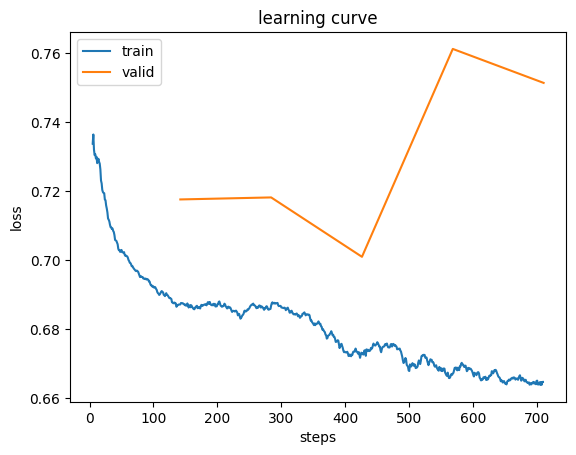

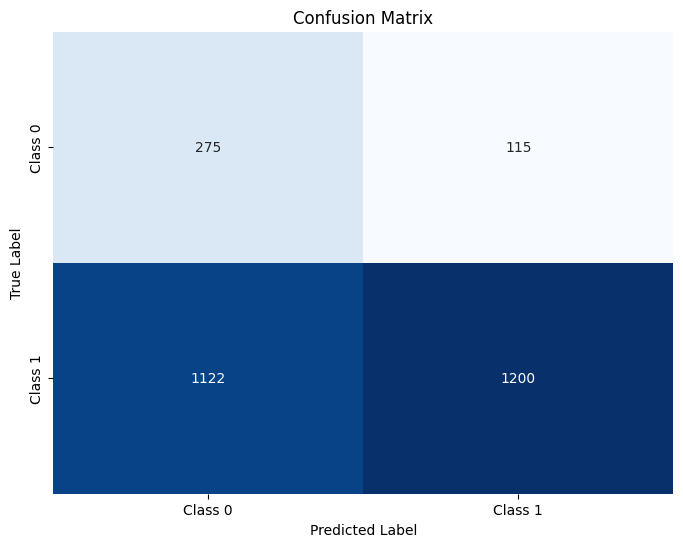

Accuracy: 0.5439
Precision: 0.9125
Recall: 0.5168
F1 Score: 0.6599
Average Precision (AP): 0.8969
Area Under ROC Curve (AUC): 0.5839


In [8]:

'''MY DATA + class weights'''
train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_train.npy")
train_data = np.load(train_dir, allow_pickle=True)
# train_data = pd.DataFrame(train_data)
test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_test.npy")
test_data = np.load(test_dir, allow_pickle=True)
# test_data = pd.DataFrame(test_data)
print(len(train_data))
print(len(test_data))
print(train_data[0])
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.utils.class_weight import compute_class_weight
from fastai.losses import CrossEntropyLossFlat

from collections import Counter

# Example dataset with windows and labels
train_windows, train_labels = create_time_windows_with_labels(train_data)
test_windows, test_labels = create_time_windows_with_labels(test_data)

# Count label distribution
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

# Print the counts
print("Train label distribution:")
print(f"  Term (0): {train_label_counts[0]}")
print(f"  Preterm (1): {train_label_counts[1]}")

print("\nTest label distribution:")
print(f"  Term (0): {test_label_counts[0]}")
print(f"  Preterm (1): {test_label_counts[1]}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Convert to tensors
train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)

train_labels_tensor = train_labels_tensor.long()
test_labels_tensor = test_labels_tensor.long()


print(train_labels_tensor.shape)

train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# Create DataLoaders
# batch_size = batch_size

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



'''CROSSENTROPY LOSS + CLASS WEIGHTS'''
from tsai.models import ResNet
from tsai.models.ResNet import ResNet
from fastai.metrics import accuracy
from fastai.data.core import DataLoaders
from fastai.learner import Learner
import torch

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Wrap your DataLoaders and set device
dls = DataLoaders.from_dsets(
    train_dataset,
    test_dataset,
    bs=batch_size,
    shuffle=True,
    num_workers=0  # avoid multiprocessing issues
)
# Define model
model = ResNet(1, 2)

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Use weighted loss
# loss_func = CrossEntropyLossFlat(weight=class_weights_tensor) # CrossEntropyLossFlat
loss_func=torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
# Replace your loss function in the learner
learn = Learner(dls, model, loss_func=loss_func, metrics=accuracy)


# Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
learn.model.to(device)

learn.dls.to(device)
# Train
learn.fit_one_cycle(5, learning_rate)


learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch

# Get predictions and true labels
preds, targs = learn.get_preds(dl=learn.dls.valid)

# Convert predictions to class labels (argmax for multi-class classification)
pred_labels = preds.argmax(dim=1)

# Compute confusion matrix
cm = confusion_matrix(targs, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score,
    roc_auc_score
)

# Convert to numpy arrays if needed
true_labels = targs.cpu().numpy()
pred_labels = pred_labels.cpu().numpy()
pred_probs = preds[:, 1].cpu().numpy()  # Probability of class 1

# Compute metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, zero_division=0)
recall = recall_score(true_labels, pred_labels, zero_division=0)
f1 = f1_score(true_labels, pred_labels, zero_division=0)
ap = average_precision_score(true_labels, pred_probs)
auc = roc_auc_score(true_labels, pred_probs)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print(f"Area Under ROC Curve (AUC): {auc:.4f}")



In [7]:
# '''BALANCED DATA NO PCA'''

# '''MY DATA'''
# train_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_train.npy")
# train_data = np.load(train_dir, allow_pickle=True)
# # train_data = pd.DataFrame(train_data)
# test_dir = os.path.join(univariate_data_path, "target_univariate_no_PCA_test.npy")
# test_data = np.load(test_dir, allow_pickle=True)
# # test_data = pd.DataFrame(test_data)
# print(len(train_data))
# print(len(test_data))
# print(train_data[0])
# from torch.utils.data import DataLoader, TensorDataset, random_split
# from sklearn.utils.class_weight import compute_class_weight

# from collections import Counter

# # Example dataset with windows and labels
# train_windows, train_labels = create_time_windows_with_labels(train_data)
# test_windows, test_labels = create_time_windows_with_labels(test_data)



# import numpy as np

# # Convert to numpy for easy indexing
# train_windows = np.array(train_windows)
# train_labels = np.array(train_labels)

# # Get indices for each class
# term_indices = np.where(train_labels == 0)[0]
# preterm_indices = np.where(train_labels == 1)[0]

# # Undersample the majority class (preterm) to match term
# n_samples = min(len(term_indices), len(preterm_indices))
# balanced_term_indices = np.random.choice(term_indices, n_samples, replace=False)
# balanced_preterm_indices = np.random.choice(preterm_indices, n_samples, replace=False)

# # Combine and shuffle
# balanced_train_indices = np.concatenate([balanced_term_indices, balanced_preterm_indices])
# np.random.shuffle(balanced_train_indices)

# # Subset
# train_windows_balanced = train_windows[balanced_train_indices]
# train_labels_balanced = train_labels[balanced_train_indices]

# test_windows = np.array(test_windows)
# test_labels = np.array(test_labels)

# term_indices = np.where(test_labels == 0)[0]
# preterm_indices = np.where(test_labels == 1)[0]

# n_samples = min(len(term_indices), len(preterm_indices))
# balanced_term_indices = np.random.choice(term_indices, n_samples, replace=False)
# balanced_preterm_indices = np.random.choice(preterm_indices, n_samples, replace=False)

# balanced_test_indices = np.concatenate([balanced_term_indices, balanced_preterm_indices])
# np.random.shuffle(balanced_test_indices)

# test_windows_balanced = test_windows[balanced_test_indices]
# test_labels_balanced = test_labels[balanced_test_indices]

# train_windows = train_windows_balanced
# train_labels = train_labels_balanced
# test_windows = test_windows_balanced
# test_labels = test_labels_balanced


# # Count label distribution
# train_label_counts = Counter(train_labels)
# test_label_counts = Counter(test_labels)



# # Print the counts
# print("Train label distribution:")
# print(f"  Term (0): {train_label_counts[0]}")
# print(f"  Preterm (1): {train_label_counts[1]}")

# print("\nTest label distribution:")
# print(f"  Term (0): {test_label_counts[0]}")
# print(f"  Preterm (1): {test_label_counts[1]}")

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# # Convert to tensors
# train_windows_tensor = torch.tensor(train_windows, dtype=torch.float32)
# train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32)
# test_windows_tensor = torch.tensor(test_windows, dtype=torch.float32)
# test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32)

# train_windows_tensor = train_windows_tensor.unsqueeze(1)  # (1071, 1, 12000)
# test_windows_tensor = test_windows_tensor.unsqueeze(1)    # (899, 1, 12000)

# train_labels_tensor = train_labels_tensor.long()
# test_labels_tensor = test_labels_tensor.long()


# print(train_labels_tensor.shape)

# train_dataset = TensorDataset(train_windows_tensor, train_labels_tensor)
# test_dataset = TensorDataset(test_windows_tensor, test_labels_tensor)

# # Create DataLoaders
# batch_size = 32

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



# '''CROSSENTROPY LOSS'''
# from tsai.models import ResNet
# from tsai.models.ResNet import ResNet
# from fastai.metrics import accuracy
# from fastai.data.core import DataLoaders
# from fastai.learner import Learner
# import torch

# # Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Wrap your DataLoaders and set device
# dls = DataLoaders.from_dsets(
#     train_dataset,
#     test_dataset,
#     bs=32,
#     shuffle=True,
#     num_workers=0  # avoid multiprocessing issues
# )
# # Define model
# model = ResNet(1, 2)

# # Create Learner
# learn = Learner(dls, model, loss_func=torch.nn.CrossEntropyLoss(), metrics=accuracy)

# # Optionally convert model to FP32 (if it was FP16 before), and ensure model is on correct device
# learn.model.to(device)

# learn.dls.to(device)
# # Train
# learn.fit_one_cycle(5, 1e-6)


# learn.recorder.plot_loss()  # Plot loss curves (training and validation loss)
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
# import torch

# # Get predictions and true labels
# preds, targs = learn.get_preds(dl=learn.dls.valid)

# # Convert predictions to class labels (argmax for multi-class classification)
# pred_labels = preds.argmax(dim=1)

# # Compute confusion matrix
# cm = confusion_matrix(targs, pred_labels)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
#             xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# from sklearn.metrics import (
#     accuracy_score,
#     precision_score,
#     recall_score,
#     f1_score,
#     average_precision_score,
#     roc_auc_score
# )

# # Convert to numpy arrays if needed
# true_labels = targs.cpu().numpy()
# pred_labels = pred_labels.cpu().numpy()
# pred_probs = preds[:, 1].cpu().numpy()  # Probability of class 1

# # Compute metrics
# accuracy = accuracy_score(true_labels, pred_labels)
# precision = precision_score(true_labels, pred_labels, zero_division=0)
# recall = recall_score(true_labels, pred_labels, zero_division=0)
# f1 = f1_score(true_labels, pred_labels, zero_division=0)
# ap = average_precision_score(true_labels, pred_probs)
# auc = roc_auc_score(true_labels, pred_probs)

# # Print results
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"Average Precision (AP): {ap:.4f}")
# print(f"Area Under ROC Curve (AUC): {auc:.4f}")
